In [132]:
import time

In [133]:
import requests as req
from bs4 import BeautifulSoup

In [134]:
import pandas as pd
import numpy as np

In [135]:
partys = {
"더불어민주당":"https://vote2020.imbc.com/Api/WinnerSetJD?jdcode=1&isBire=0&callback=WinnerSetJD_1_0_202004160130",
"미래통합당":"https://vote2020.imbc.com/Api/WinnerSetJD?jdcode=2&isBire=0&callback=WinnerSetJD_2_0_202004160130",
"무소속":"https://vote2020.imbc.com/Api/WinnerSetJD?jdcode=99&isBire=0&callback=WinnerSetJD_99_0_202004160130",
}

In [136]:
df = pd.DataFrame()
for party in list(partys.keys()):
    html = req.get(partys[party]).text
    html = html.replace(url.split("=")[-1],'').replace('")',"").replace('("',"")
    soup = BeautifulSoup(html, 'html.parser')

    names = [name.text for name in soup.find_all("p")]
    locations= [location.text for location in soup.find_all("span") if location.text]

    sido = []
    sigungu = []
    for n, location in enumerate(locations):
        if n % 2 == 0:
            sido.append(location)
        else:
            sigungu.append(location)
    
    rows = [ [r1, r2, r3] for r1, r2, r3 in zip(names, sido, sigungu)]
    temp = pd.DataFrame(rows, columns=['당선자명', '시도명', '선거구명'])
    temp['소속정당'] = party
    
    df = pd.concat([df, temp])
df

,당선자명,시도명,선거구명,소속정당
0,이낙연,서울,종로구,더불어민주당
1,서영교,서울,중랑구갑,더불어민주당
2,박홍근,서울,중랑구을,더불어민주당
3,기동민,서울,성북구을,더불어민주당
4,고용진,서울,노원구갑,더불어민주당
...,...,...,...,...
68,서일준,경남,거제시,미래통합당
69,윤영석,경남,양산시갑,미래통합당
0,윤상현,인천,동구미추홀구을,무소속
1,이용호,전북,남원시임실군순창군,무소속


In [137]:
df['선거구명 전체'] = df['시도명'] + ' ' + df['선거구명']

In [138]:
import platform

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [139]:
BORDER_LINES = [
    [[1, 1, 5, 5, 1], [18, 20, 20, 18, 18]],# 광주광역시
    [[1, 2, 2, 5, 5, 1, 1, 3, 3, 0, 0, 1, 1], [22, 22, 21, 21, 20, 20, 18, 18, 17, 17, 20, 20, 22]],# 전라남도
    [[14, 14, 15, 15, 16, 16, 16, 14], [20, 22, 22, 21, 21, 21, 20, 20]],# 제주도
    [[2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 2], [14, 16, 16, 17, 17, 18, 18, 16, 16, 14, 14]],# 전라북도
    [ [4, 4, 6, 6, 7, 7, 6, 6, 4], [14, 16, 16, 15, 15, 12, 12, 14, 14]],# 대전광역시
    [[4, 4, 6, 6], [14, 13, 13, 14]],# 세종특별시
    [[2, 1, 1, 2, 2, 3, 3, 5, 5, 6, 6], [14, 14, 13, 13, 12, 12, 10, 10, 12, 12, 13]],# 충청남도
    [[2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4] , [12, 12, 10, 10, 7, 7, 8, 8, 9, 9, 10]], # 인천광역시
    [[9, 9, 6, 6, 5, 4, 4, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 12, 12, 14, 14, 13, 13],
    [1, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 8, 8, 9, 9, 10, 10, 12, 12, 12, 10, 10, 9, 9, 3]], # 경기도
    [[13, 9, 9, 12, 12, 11, 11, 8, 8, 5, 5, 3, 3, 4, 4, 6, 6, 7, 7, 9],
     [3, 3, 4, 4, 7, 7, 8, 8, 9, 9, 8, 8, 6, 6, 3, 3, 2, 2, 1, 1]], # 경기도
    [[9, 10, 10, 11, 11, 13, 13, 12, 12, 9],
     [1, 1, 2, 2, 3, 3, 1, 1, 0, 0]], # 강원도
    [[5, 6, 6, 7, 7, 8, 8, 9, 9, 7, 7],
     [21, 21, 22, 22, 19, 19, 17, 17, 16, 16, 15]], # 경상남도
    [[7, 9, 9, 12, 12, 13, 13, 14, 14, 12, 12, 10, 10, 9],
     [20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 16, 16]], # 부산광역시
    [[7, 9, 9, 10, 10, 12, 12], [13, 13, 14, 14, 13, 13, 15]], # 대구광역시
    [[12, 13, 13, 15, 15, 14, 14], [14, 14, 13, 13, 14, 14, 16]], # 울산광역시
    [[12, 12, 13, 13, 14, 14, 13, 13, 14, 14, 15, 15, 16, 16, 15, 15],
     [13, 12, 12, 10, 10, 9, 9, 6, 6, 9, 9, 11, 11, 12, 12, 13]], # 경상북도
]

In [140]:
election_map = pd.read_excel('../data/korea_map_21th_election_type_b_displayname.xlsx')
election_map = election_map[['X','Y','선거구명 전체', '시도명', '표기이름']].sort_values('선거구명 전체')
election_map

,X,Y,선거구명 전체,시도명,표기이름
216,12,1,강원 강릉시,강원,강릉시
217,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선
197,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양
179,10,1,강원 원주시갑,강원,원주 갑
199,11,2,강원 원주시을,강원,원주 을
...,...,...,...,...,...
190,10,12,충북 청주시상당구,충북,청주 상당
151,8,12,충북 청주시서원구,충북,청주 서원
131,7,12,충북 청주시청원구,충북,청주 청원
171,9,12,충북 청주시흥덕구,충북,청주 흥덕


In [141]:
# 데이터 병합
df_election = pd.merge(election_map, df, how='outer')
df_election.head()

,X,Y,선거구명 전체,시도명,표기이름,당선자명,선거구명,소속정당
0,12,1,강원 강릉시,강원,강릉시,NaN,NaN,NaN
1,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선,이철규,동해시태백시삼척시정선군,미래통합당
2,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양,이양수,속초시인제군고성군양양군,미래통합당
3,10,1,강원 원주시갑,강원,원주 갑,NaN,NaN,NaN
4,11,2,강원 원주시을,강원,원주 을,NaN,NaN,NaN


In [142]:
df_election.loc[df_election['소속정당'].isna(), '소속정당'] = '경선중'
df_election

,X,Y,선거구명 전체,시도명,표기이름,당선자명,선거구명,소속정당
0,12,1,강원 강릉시,강원,강릉시,NaN,NaN,경선중
1,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선,이철규,동해시태백시삼척시정선군,미래통합당
2,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양,이양수,속초시인제군고성군양양군,미래통합당
3,10,1,강원 원주시갑,강원,원주 갑,NaN,NaN,경선중
4,11,2,강원 원주시을,강원,원주 을,NaN,NaN,경선중
...,...,...,...,...,...,...,...,...
248,10,12,충북 청주시상당구,충북,청주 상당,NaN,NaN,경선중
249,8,12,충북 청주시서원구,충북,청주 서원,이장섭,청주시서원구,더불어민주당
250,7,12,충북 청주시청원구,충북,청주 청원,NaN,NaN,경선중
251,9,12,충북 청주시흥덕구,충북,청주 흥덕,도종환,청주시흥덕구,더불어민주당


In [143]:
df_election.groupby(['시도명', '소속정당'])['소속정당'].agg(['count'])

count
시도명 소속정당         
강원  경선중         5
    미래통합당       3
경기  경선중        23
    더불어민주당     31
    미래통합당       5
경남  경선중         4
    무소속         1
    미래통합당      11
경북  경선중         1
    미래통합당      12
광주  경선중         3
    더불어민주당      5
대구  경선중         1
    미래통합당      11
대전  경선중         6
    더불어민주당      1
부산  경선중         4
    더불어민주당      2
    미래통합당      12
서울  경선중        30
    더불어민주당     16
    미래통합당       3
세종  더불어민주당      2
울산  경선중         1
    미래통합당       5
인천  경선중         5
    더불어민주당      6
    무소속         1
    미래통합당       1
전남  경선중         1
    더불어민주당      9
전북  더불어민주당      9
    무소속         1
제주  더불어민주당      3
충남  경선중         3
    더불어민주당      4
    미래통합당       4
충북  경선중         2
    더불어민주당      3
    미래통합당       3

In [144]:
df_election['소속정당'].value_counts()

더불어민주당    91
경선중       89
미래통합당     70
무소속        3
Name: 소속정당, dtype: int64

In [145]:
# 데이터 시각화를 위한 값 추가
for num, party in enumerate(df_election['소속정당'].unique()):
    df_election.loc[df_election['소속정당'] == party, 'SUCCESSFUL'] = num
    
df_election

,X,Y,선거구명 전체,시도명,표기이름,당선자명,선거구명,소속정당,SUCCESSFUL
0,12,1,강원 강릉시,강원,강릉시,NaN,NaN,경선중,0.0
1,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선,이철규,동해시태백시삼척시정선군,미래통합당,1.0
2,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양,이양수,속초시인제군고성군양양군,미래통합당,1.0
3,10,1,강원 원주시갑,강원,원주 갑,NaN,NaN,경선중,0.0
4,11,2,강원 원주시을,강원,원주 을,NaN,NaN,경선중,0.0
...,...,...,...,...,...,...,...,...,...
248,10,12,충북 청주시상당구,충북,청주 상당,NaN,NaN,경선중,0.0
249,8,12,충북 청주시서원구,충북,청주 서원,이장섭,청주시서원구,더불어민주당,2.0
250,7,12,충북 청주시청원구,충북,청주 청원,NaN,NaN,경선중,0.0
251,9,12,충북 청주시흥덕구,충북,청주 흥덕,도종환,청주시흥덕구,더불어민주당,2.0


In [146]:
# 데이터 시각화를 위한 지도 생성

final = df_election.pivot_table(index='Y', columns='X', values='SUCCESSFUL', aggfunc='first')
final

X,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Y,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,NaN,NaN,NaN
2,NaN,NaN,2.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,NaN,NaN,NaN
3,NaN,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
5,NaN,NaN,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,NaN,NaN
7,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN
8,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,NaN,NaN


In [147]:
# 색상 부여
from matplotlib.colors import LinearSegmentedColormap

color = {
    '경선중':'#000000',
    '미래통합당':'#ef426f',
    '더불어민주당':'#1a4fa2',
    '무소속':'#D3D3D3'
}
cm = LinearSegmentedColormap.from_list('election', list(color.values()), N=4)

In [148]:
df_election.head()

,X,Y,선거구명 전체,시도명,표기이름,당선자명,선거구명,소속정당,SUCCESSFUL
0,12,1,강원 강릉시,강원,강릉시,NaN,NaN,경선중,0.0
1,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선,이철규,동해시태백시삼척시정선군,미래통합당,1.0
2,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양,이양수,속초시인제군고성군양양군,미래통합당,1.0
3,10,1,강원 원주시갑,강원,원주 갑,NaN,NaN,경선중,0.0
4,11,2,강원 원주시을,강원,원주 을,NaN,NaN,경선중,0.0


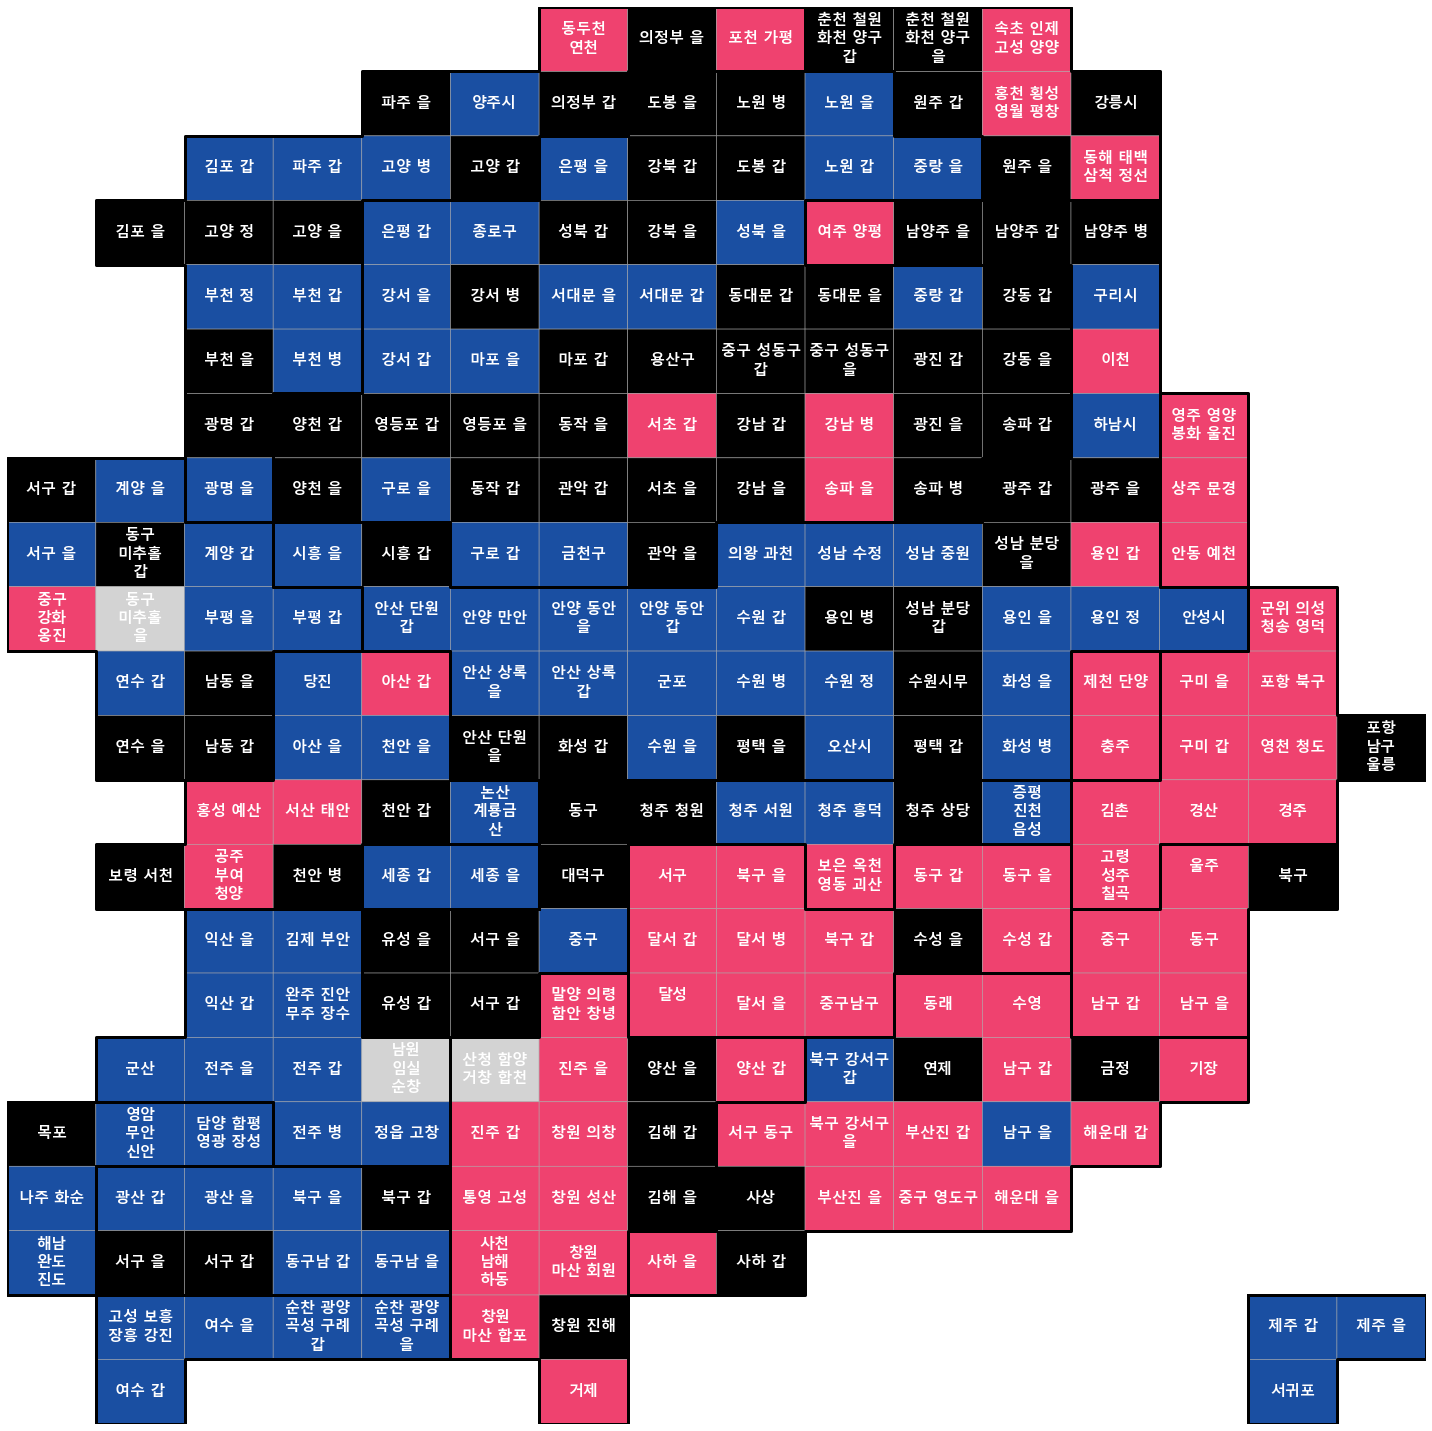

In [149]:
plt.figure(figsize=(20, 20))

plt.pcolor(final, cmap=cm, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in df_election.iterrows():
    name = row['표기이름']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=15, ha='center', va='center', color='white')

for path in BORDER_LINES:
    x, y = path
    plt.plot(x, y, c='black', lw=3)
    
plt.gca().invert_yaxis()

plt.axis('off')
plt.tight_layout()
plt.savefig('../당선결과.png')
plt.show()

In [150]:
df_election.to_excel('../data/korea_map_21th_election_type_b_result.xlsx', index=False)